In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("/tmp/data1/", one_hot=True, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data1/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data1/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data1/t10k-images-idx3-ubyte.gz
Extracting /tmp/data1/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print("no.of examples in training set: {}".format(fashion_mnist.train.images.shape))
print("no.of labels in training set: {}".format(fashion_mnist.train.labels.shape))
print("no.of examples in test set: {}".format(fashion_mnist.test.images.shape))
print("no.of labels in test set: {}".format(fashion_mnist.test.labels.shape))

no.of examples in training set: (55000, 784)
no.of labels in training set: (55000, 10)
no.of examples in test set: (10000, 784)
no.of labels in test set: (10000, 10)


In [4]:
labels = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

y = 5 (Sandal)


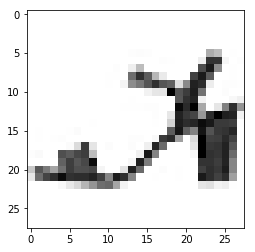

In [7]:
img1 = fashion_mnist.train.images[30].reshape(28,28)
plt.imshow(img1, cmap='Greys')
label1 = np.where(fashion_mnist.train.labels[30]==1)[0][0]
print("y = {} ({})".format(label1,labels[label1]))

y = 7 (Sneaker)


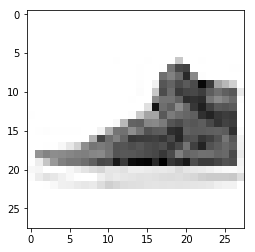

In [39]:
img2 = fashion_mnist.train.images[20].reshape(28,28)
plt.imshow(img2, cmap='Greys')
label2 = np.where(fashion_mnist.train.labels[20]==1)[0][0]
print("y = {} ({})".format(label2, labels[label2]))

In [8]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [9]:
x_shaped = tf.reshape(x,[-1,28,28,1])

In [10]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')


In [11]:
def maxpool2d(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [12]:
#define filters and biases for 1st convolution layer
w_c1 = tf.Variable(tf.random_normal([5,5,1,32]))
b_c1 = tf.Variable(tf.random_normal([1,1,1,32]))

In [13]:
#perform convolution
conv1 = tf.nn.relu(conv2d(x_shaped, w_c1))
conv1 = maxpool2d(conv1)

In [48]:
#output dimension of 1st convolution layer
# as we use SAME padding, output of convolution layer remains (28 x 28 x 32)
# pooling downsamples the image by 2. So at the end of CONV,POOLING -> (14 x 14 x 32)

In [14]:
#define filters and biases for 2nd convolution layer
w_c2 = tf.Variable(tf.random_normal([5,5,32,64]))
b_c2 = tf.Variable(tf.random_normal([1,1,1,64]))

In [15]:
conv2 = tf.nn.relu(conv2d(conv1, w_c2))
conv2 = maxpool2d(conv2)

In [51]:
#output dimension of 2nd convolution layer
#SAME padding, output of CONV -> (14 x 14 x 64)
#pooling downsamples the image by 2. So CONV,POOLING -> (7 x 7 x 64)


In [16]:
#now flatten the output to feed it into the FC layer
x_flattened = tf.reshape(conv2, [-1, 7*7*64])
w_fc = tf.Variable(tf.random_normal([7*7*64,1024]))
b_fc = tf.Variable(tf.random_normal([1024]))
fc = tf.nn.relu(tf.matmul(x_flattened, w_fc) + b_fc)


In [17]:
#output layer
w_out = tf.Variable(tf.random_normal([1024,10]))
b_out = tf.Variable(tf.random_normal([10]))
output = tf.matmul(fc, w_out) + b_out
yhat = tf.nn.softmax(output)

In [18]:
learning_rate = 0.01
#define a loss function as a cross entropy loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))
#minimize the loss function using an optimizer called adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [19]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
epochs = 10
batch_size = 100


In [21]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    total_batches = int(len(fashion_mnist.train.labels)/batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batches):
            x_train, y_train = fashion_mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cross_entropy], feed_dict = {x:x_train, y:y_train})
            avg_cost += c/total_batches
        print("Epoch: {} avg_cost: {}".format(epoch,avg_cost))
    print("Training completed...")    
    acc = sess.run(accuracy, feed_dict={x:fashion_mnist.test.images,y:fashion_mnist.test.labels})
    predictions = sess.run(tf.argmax(yhat,1), feed_dict = {x:fashion_mnist.test.images})
    print("Accuracy: ",acc)
    print("Predictions: ", predictions)

Epoch: 0 avg_cost: 1891.687277818161
Epoch: 1 avg_cost: 85.30039138793943
Epoch: 2 avg_cost: 39.52445043043653
Epoch: 3 avg_cost: 22.03201013044877
Epoch: 4 avg_cost: 14.176420402093354
Epoch: 5 avg_cost: 9.900628008625727
Epoch: 6 avg_cost: 7.761369629339741
Epoch: 7 avg_cost: 6.416437492587351
Epoch: 8 avg_cost: 5.7340288481929065
Epoch: 9 avg_cost: 5.012077119133682
Training completed...
Accuracy:  0.7296
Predictions:  [9 2 1 ... 1 1 5]


Actual:  Pullover
Predicted:  Pullover


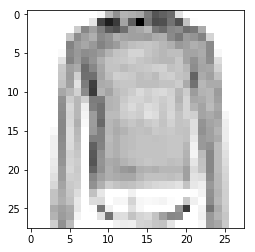

In [28]:
#validation time
test_img=fashion_mnist.test.images[16].reshape(28,28)
plt.imshow(test_img, cmap='Greys')
print("Actual: ", labels[np.where(fashion_mnist.test.labels[16]==1)[0][0]])
print("Predicted: ",labels[predictions[16]])